Step 1: Elbow Method


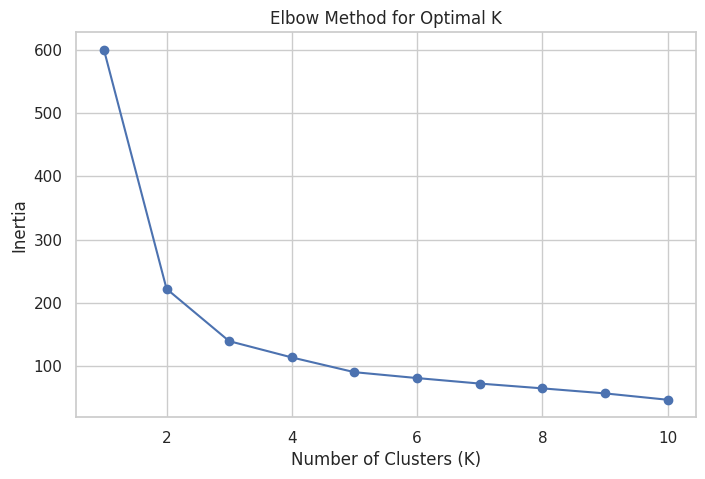


Step 2: KMeans Clustering with k=3
Silhouette Score: 0.4599

Step 3: Cluster Visualization


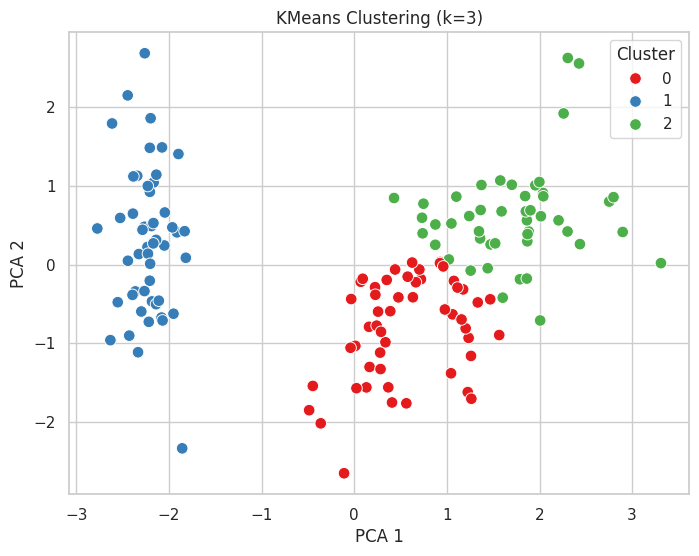

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style='whitegrid')

# ------------------------- Load & Preprocess ------------------------- #
def load_dataset():
    """Loads the Iris dataset from sklearn and returns scaled data."""
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    df = pd.DataFrame(X, columns=feature_names)
    return df, y

def preprocess_data(df):
    """Standardizes the features."""
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    return scaled

# ------------------------- Modeling & Evaluation ------------------------- #
def elbow_method(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return labels, score

# ------------------------- Visualization ------------------------- #
def plot_clusters_2D(data, labels, title='KMeans Clusters (PCA Reduced)'):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='Set1', s=70)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()

# ------------------------- Main Flow ------------------------- #
def run_kmeans_on_iris(optimal_k=3):
    df, y_true = load_dataset()
    scaled_data = preprocess_data(df)

    print("Step 1: Elbow Method")
    elbow_method(scaled_data)

    print(f"\nStep 2: KMeans Clustering with k={optimal_k}")
    labels, score = apply_kmeans(scaled_data, optimal_k)
    print(f"Silhouette Score: {score:.4f}")

    print("\nStep 3: Cluster Visualization")
    plot_clusters_2D(scaled_data, labels, title=f"KMeans Clustering (k={optimal_k})")

# Run it!
run_kmeans_on_iris(optimal_k=3)